### The dataset contains one file, with the following fields:



 -  unitid: a unique id for the message
<br>
- _golden: always FALSE; (presumably whether the message was in Crowdflower's gold standard)
<br>
- unitstate: always "finalized"
<br>
- trustedjudgments: the number of trusted human judgments that were entered for this message; an integer between 1 and 3
<br>
- lastjudgment_at: when the final judgment was collected
<br>
- audience: one of national or constituency
<br>
- audience:confidence: a measure of confidence in the audience judgment; a float between 0.5 and 1
<br>
- bias: one of neutral or partisan
<br>
- bias:confidence: a measure of confidence in the bias judgment; a float between 0.5 and 1
<br>
- message: the aim of the message. one of:
-- attack: the message attacks another politician
-- constituency: the message discusses the politician's constituency
-- information: an informational message about news in government or the wider U.S.
-- media: a message about interaction with the media
-- mobilization: a message intended to mobilize supporters
-- other: a catch-all category for messages that don't fit into the other
-- personal: a personal message, usually expressing sympathy, support or condolences, or other personal opinions
-- policy: a message about political policy
-- support: a message of political support
<br>
- message:confidence: a measure of confidence in the message judgment; a float between 0.5 and 1
<br>
- orig__golden: always empty; presumably whether some portion of the message was in the gold standard
<br>
- audience_gold: always empty; presumably whether the audience response was in the gold standard
<br>
- bias_gold: always empty; presumably whether the bias response was in the gold standard
<br>
- bioid: a unique id for the politician
<br>
- embed: HTML code to embed this message
<br>
- id: unique id for the message WITHIN whichever social media site it was pulled from
<br>
- label: a string of the form "From: firstname lastname (position from state)"
<br>
- message_gold: always blank; presumably whether the message response was in the gold standard
<br>
- source: where the message was posted; one of "facebook" or "twitter"
<br>
- text: the text of the message

### Target:Predict whether the social media post is partisan or neutral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data=pd.read_csv(r'D:\Devi\ICT_TVM\CASE STUDY\political_social_media_1.csv',encoding='iso-8859-1')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,08-04-2015 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,08-04-2015 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,08-04-2015 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,08-04-2015 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.99E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,08-04-2015 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.08E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


### DATA ANALYSIS

In [5]:
data.shape

(5000, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             5000 non-null   int64  
 1   _golden              5000 non-null   bool   
 2   _unit_state          5000 non-null   object 
 3   _trusted_judgments   5000 non-null   int64  
 4   _last_judgment_at    5000 non-null   object 
 5   audience             5000 non-null   object 
 6   audience:confidence  5000 non-null   float64
 7   bias                 4924 non-null   object 
 8   bias:confidence      4871 non-null   float64
 9   message              5000 non-null   object 
 10  message:confidence   5000 non-null   float64
 11  orig__golden         0 non-null      float64
 12  audience_gold        0 non-null      float64
 13  bias_gold            0 non-null      float64
 14  bioid                5000 non-null   object 
 15  embed                5000 non-null   o

In [7]:
data.isna().sum()

_unit_id                  0
_golden                   0
_unit_state               0
_trusted_judgments        0
_last_judgment_at         0
audience                  0
audience:confidence       0
bias                     76
bias:confidence         129
message                   0
message:confidence        0
orig__golden           5000
audience_gold          5000
bias_gold              5000
bioid                     0
embed                     0
id                        0
label                     0
message_gold           5000
source                    0
text                      0
dtype: int64

In [8]:
data.columns


Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'audience', 'audience:confidence', 'bias',
       'bias:confidence', 'message', 'message:confidence', 'orig__golden',
       'audience_gold', 'bias_gold', 'bioid', 'embed', 'id', 'label',
       'message_gold', 'source', 'text'],
      dtype='object')

In [10]:
data.source.value_counts()

twitter     2500
facebook    2500
Name: source, dtype: int64

In [12]:
data.dtypes

_unit_id                 int64
_golden                   bool
_unit_state             object
_trusted_judgments       int64
_last_judgment_at       object
audience                object
audience:confidence    float64
bias                    object
bias:confidence        float64
message                 object
message:confidence     float64
orig__golden           float64
audience_gold          float64
bias_gold              float64
bioid                   object
embed                   object
id                      object
label                   object
message_gold           float64
source                  object
text                    object
dtype: object

In [11]:
data.nunique()

_unit_id               5000
_golden                   1
_unit_state               1
_trusted_judgments        3
_last_judgment_at       238
audience                  2
audience:confidence      31
bias                      2
bias:confidence          35
message                   9
message:confidence       23
orig__golden              0
audience_gold             0
bias_gold                 0
bioid                   505
embed                  5000
id                     2763
label                   505
message_gold              0
source                    2
text                   5000
dtype: int64

This dataset,provides text of 5000 messages from politicians' social media accounts, along with human judgments about the purpose, partisanship, and audience of the messages,containing 21 columns.


In [4]:
num_cols = [features for features in data.columns if data[features].dtypes!='O']

In [5]:
data[num_cols].head()

,_unit_id,_golden,_trusted_judgments,audience:confidence,bias:confidence,message:confidence,orig__golden,audience_gold,bias_gold,message_gold
0,766192484,False,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,766192485,False,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,766192486,False,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,766192487,False,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,766192488,False,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [6]:
cat_cols = [features for features in data.columns if data[features].dtypes =='O']

In [7]:
data[cat_cols].head()

,_unit_state,_last_judgment_at,audience,bias,message,bioid,embed,id,label,source,text
0,finalized,08-04-2015 21:17,national,partisan,policy,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83E+17,From: Trey Radel (Representative from Florida),twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,finalized,08-04-2015 21:20,national,partisan,attack,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11E+17,From: Mitch McConnell (Senator from Kentucky),twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,finalized,08-04-2015 21:14,national,neutral,support,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39E+17,From: Kurt Schrader (Representative from Oregon),twitter,Please join me today in remembering our fallen...
3,finalized,08-04-2015 21:08,national,neutral,policy,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.99E+17,From: Michael Crapo (Senator from Idaho),twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,finalized,08-04-2015 21:26,national,partisan,policy,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.08E+17,From: Mark Udall (Senator from Colorado),twitter,.@amazon delivery #drones show need to update ...


### Univariate

<AxesSubplot:>

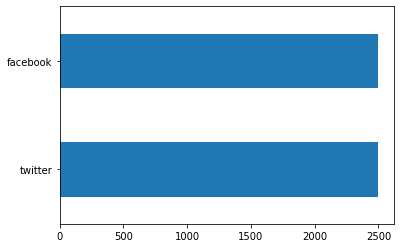

In [15]:
data.source.value_counts().plot(kind='barh')

There are equal number of posts from twitter and facebook

<AxesSubplot:>

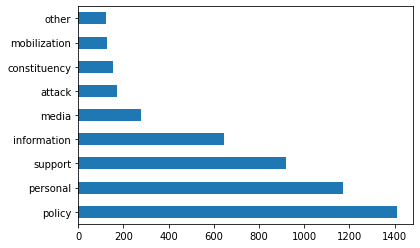

In [27]:
data.message.value_counts().plot(kind = 'barh')

There are more messages were tagged either in policy or personal messages. The least tagged messages are mobilization and others

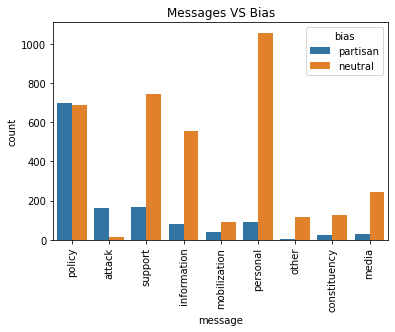

In [49]:
# we can check for different kind of messages from Partisans and neutral bias
sns.countplot(data=data, x=data['message'],hue='bias')
plt.title("Messages VS Bias")
plt.xticks(rotation=90)
plt.show()


From the graph we can conclude that both partisan and neutral tagged policy messages equally. 

array([[<AxesSubplot:title={'center':'_unit_id'}>,
        <AxesSubplot:title={'center':'_trusted_judgments'}>,
        <AxesSubplot:title={'center':'audience:confidence'}>],
       [<AxesSubplot:title={'center':'bias:confidence'}>,
        <AxesSubplot:title={'center':'message:confidence'}>,
        <AxesSubplot:title={'center':'orig__golden'}>],
       [<AxesSubplot:title={'center':'audience_gold'}>,
        <AxesSubplot:title={'center':'bias_gold'}>,
        <AxesSubplot:title={'center':'message_gold'}>]], dtype=object)

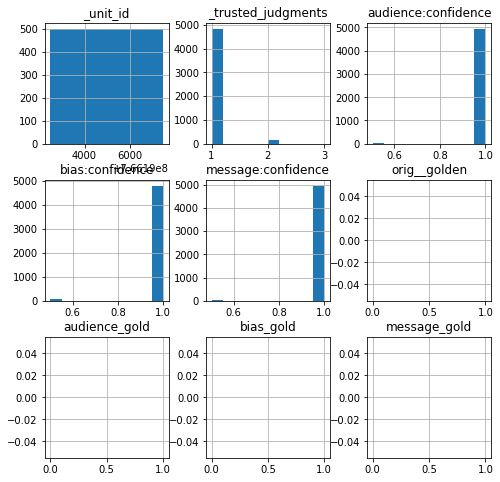

In [120]:
data[num_cols].hist(figsize=(8,8))

From this we can conclude that  all the features containing descrete numerical values and some having null values

### Bivariate

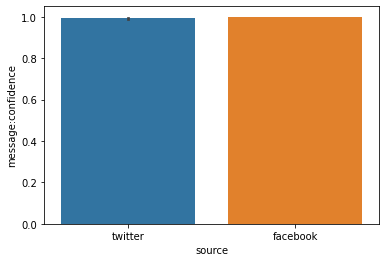

In [50]:
sns.barplot(data=data,y='message:confidence',x='source')
plt.show()

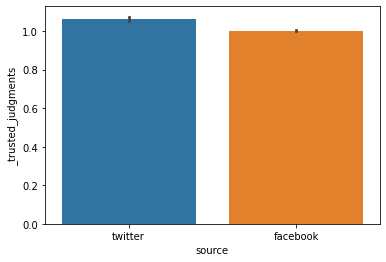

In [51]:
sns.barplot(data=data,y='_trusted_judgments',x='source')
plt.show()

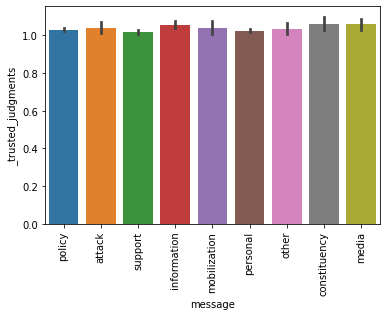

In [53]:
sns.barplot(data=data,y='_trusted_judgments',x='message')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Messages VS Bias')

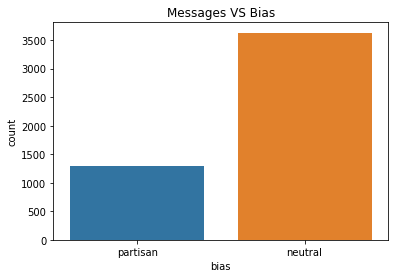

In [59]:
sns.countplot(data=data, x=data['bias'])
plt.title("Messages VS Bias")

There is a large variation in between partisan posts and neutral posts, Most of them are neutrally taggede messages

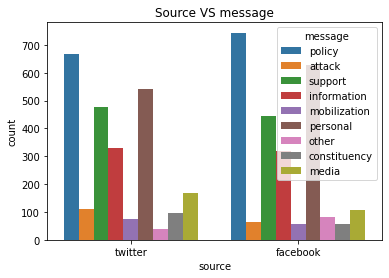

In [122]:
sns.countplot(data=data,x='source',hue='message')
plt.title('Source VS message')
plt.show()

Policy messages are tagged mostly from twitter and facebook followed by personal messages.

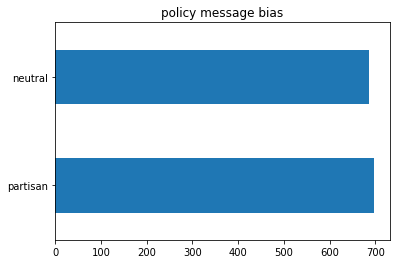

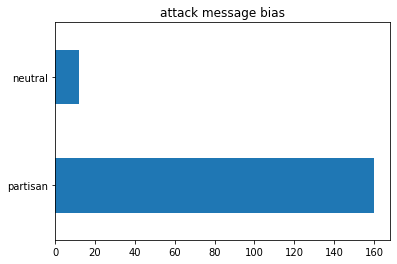

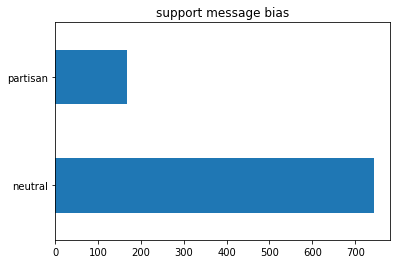

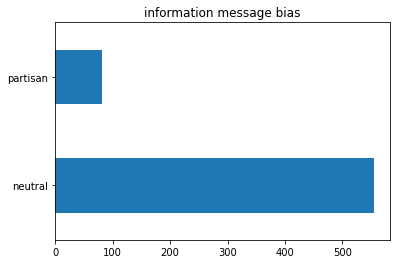

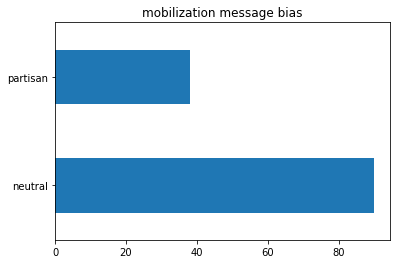

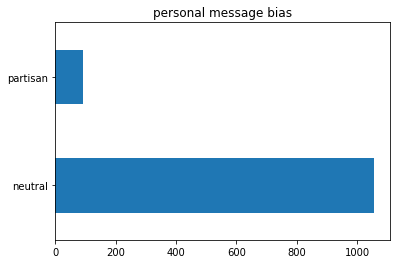

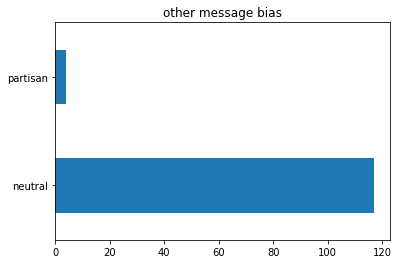

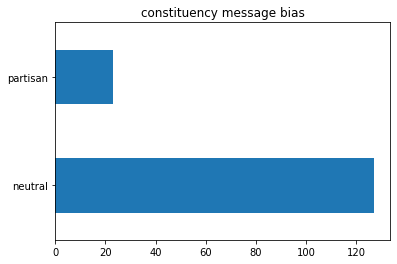

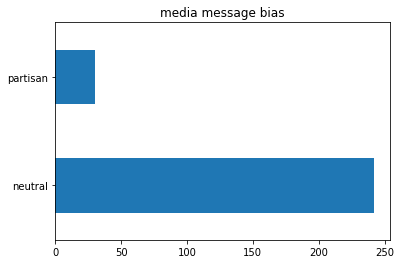

In [123]:
for message in data.message.unique():
    bias = data.bias[data.message==message]
    bias.value_counts().plot(kind = 'barh', title="{} message bias".format(message))
    plt.show()

We can see that for every message category, with the exception of "attack" and "policy", the majority of posts were tagged as neutral.

### Data Preprocessing

In [124]:
#handling missing values
data.isna().sum()

_unit_id                  0
_golden                   0
_unit_state               0
_trusted_judgments        0
_last_judgment_at         0
audience                  0
audience:confidence       0
bias                     76
bias:confidence         129
message                   0
message:confidence        0
orig__golden           5000
audience_gold          5000
bias_gold              5000
bioid                     0
embed                     0
id                        0
label                     0
message_gold           5000
source                    0
text                      0
dtype: int64

There is missing values in Bias,bias:confidence,orig_golden,audience_gold,bias_gold. From the data we can drop the columns orig_golden,audience_gold,bias_gold which contains full null values

In [126]:
data.drop(['orig__golden','message_gold','audience_gold','bias_gold'],axis=1,inplace=True)

In [127]:
data.isna().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
audience                 0
audience:confidence      0
bias                    76
bias:confidence        129
message                  0
message:confidence       0
bioid                    0
embed                    0
id                       0
label                    0
source                   0
text                     0
dtype: int64

<AxesSubplot:xlabel='bias', ylabel='count'>

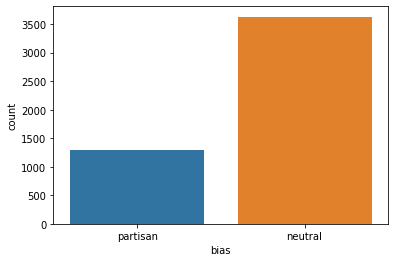

In [53]:
sns.countplot(data=data, x='bias')

In [128]:
data['bias'] = data['bias'].ffill()

In [129]:
data.isna().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
audience                 0
audience:confidence      0
bias                     0
bias:confidence        129
message                  0
message:confidence       0
bioid                    0
embed                    0
id                       0
label                    0
source                   0
text                     0
dtype: int64

We have successfully filled the bias data with forward filling method

In [130]:
#Filling Bias confidence column with mode
data['bias:confidence'] = data['bias:confidence'].fillna(data['bias:confidence'].mode()[0])

In [131]:
data.isna().sum()

_unit_id               0
_golden                0
_unit_state            0
_trusted_judgments     0
_last_judgment_at      0
audience               0
audience:confidence    0
bias                   0
bias:confidence        0
message                0
message:confidence     0
bioid                  0
embed                  0
id                     0
label                  0
source                 0
text                   0
dtype: int64

<AxesSubplot:>

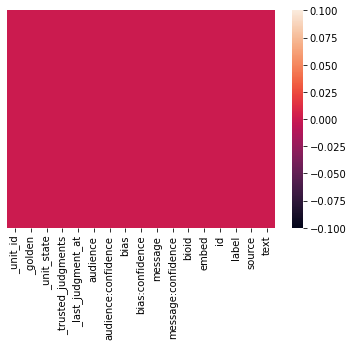

In [132]:
sns.heatmap(data.isna(),yticklabels=False)

There is no null values in our dataset

We analyse that the features "golden" and "unit state" containing unique value, golden always false and unitstate always finalized so these not important.embed containing 5000 unique html codes, bioid is the unique identity of politicians and the data is their posts during 2 days,which is same as the label,heretext is important than the unique identifification number,which not produce any charecteristic for the data.there is equal number of twitter and facebook posts.Almost every post got the value of audience confidence, bias confidence,mesage confidence as one.By analysed the message feature we find  that for every message category, with the exception of "attack" and "policy", the majority of posts were tagged as neutral.

To predict wheather a post is partisan or neutral, we can choose  the text and bias feature from the data,and go with sentimental analysis. For the sake of simplicity, we say a post contains partisan speech if it has a attack or policy sentiment associated with it. So, the task is to classify attack and policy post from other texts.

### Word Frequency

#### Sentimental Analysis

In [58]:
#seperating partisan and neutral posts
partisan_post = data.text[data.bias == 'partisan']
neutral_post = data.text[data.bias == 'neutral']

In [59]:
partisan_post

0       RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1       VIDEO - #Obamacare:  Full of Higher Costs and ...
4       .@amazon delivery #drones show need to update ...
5       Called on the @USDOTFRA to release info about ...
9       Great op-ed by Pres. Clinton about signing #FM...
                              ...                        
4967    The Constitution is clear: President Obama can...
4968    In 2005, banking lobbyists successfully convin...
4987    In the PresidentÛªs State of the Union addres...
4995    I applaud Governor PerryÛªs recent decision t...
4996    Today, I voted in favor of H.R. 5016 - Financi...
Name: text, Length: 1304, dtype: object

In [60]:
neutral_post

2       Please join me today in remembering our fallen...
3       RT @SenatorLeahy: 1st step toward Senate debat...
6       @BBCWorld, help us keep the kidnapped Nigerian...
7       Show your Arizona pride-choose your favorite S...
8       What a wonderful night at State Senator Ken Ya...
                              ...                        
4993    Today I will be back in Bloomington for a ÛÏM...
4994    I was honored to host the Discovery Channel in...
4997    (Taken from posted WOKV interview)   Congressm...
4998    Join me next week for a town hall in Ocala! I'...
4999    Foreign Affairs Committee Hearing on Syria. I ...
Name: text, Length: 3696, dtype: object

Next, let's visualize the frequency of words and word pairs for neutral and partisan posts. We'll first use the function below to clean the text in the posts. For that we need to import some libraries

In [20]:

from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from collections import Counter
import tweepy
import re
import string
import imblearn
import joblib


import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.collocations import *
from nltk import FreqDist
from nltk.probability import FreqDist


In [61]:
stopwords_list = [stopwords.words('english')]
for w in ['http ', 'com', 'amp']:
    stopwords_list.append(w)

In [ ]:
>>> import nltk
>>> nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [62]:
def clean_words(text):
    
   
    
    #join all strings in text and separate them by white space
    joined_text = "".join(text) 
    
    #remove all characters that are not letters
    joined_text = re.sub('[^A-Za-z ]+', ' ', joined_text)
    
    #convert all words in list to their base form, or 'lemma'
    words = [WordNetLemmatizer().lemmatize(word) for word in joined_text]
    
    #create a list of individual strings for each word in the text 
    words = word_tokenize(joined_text)
    
    
    clean_words_list = []
    
    for word in words:
        
        #exclude words that don't contribute to the meaning of the text
        stopwords_list = stopwords.words('english')
        for w in ['http', 'com', 'amp', 'www']:
            stopwords_list.append(w)
        
        if len(word) > 2 and word not in stopwords_list:
            
            #populate clean words list with remaining words
            clean_words_list.append(word.lower())
    
    return clean_words_list

In [63]:
clean_partisan = clean_words(partisan_post)
clean_neutral = clean_words(neutral_post)

In [64]:
for post in clean_partisan[0:10]:
    print(post)
    

nowthisnews
rep
trey
radel
slams
obamacare
politics
https
zvywmg
yihvideo


In [65]:
for post in clean_neutral[0:10]:
    print(post)

please
join
today
remembering
fallen
heroes
honoring
men
women
currently


As we can see all our posts are cleaned

### Visualising the Clean data words

In [ ]:
#Takes in a clean list of words and a name for the word cloud. Returns a 25x25 word cloud  with the top 1000 most frequent words."""

In [104]:
def plot_wordcloud(clean_words, name):
     
   
        
    wc = WordCloud(background_color="Black", max_words=1000, max_font_size = 50)
    clean_string = ','.join(clean_words)
    wc.generate(clean_string)

    f = plt.figure(figsize=(15,15))
    plt.axis("off")
    plt.imshow(wc, interpolation='bilinear')
    plt.title('{} Word Cloud'.format(name), size=30, fontname='Silom')
    plt.axis("off")
    plt.show()

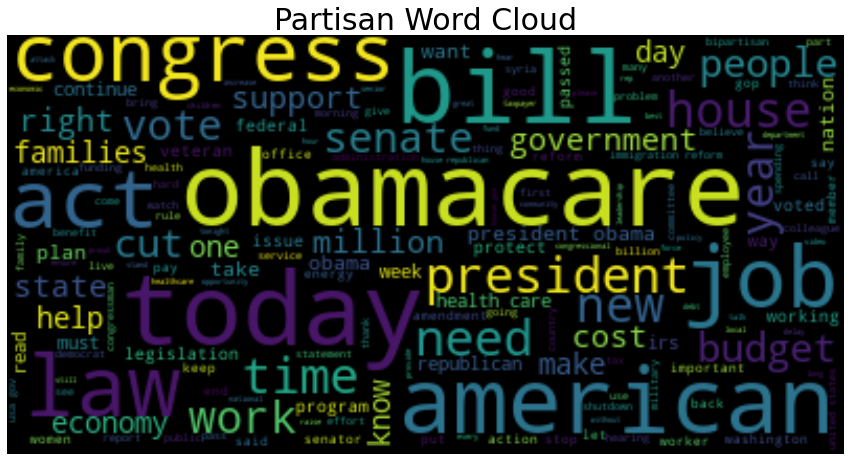

In [105]:
plot_wordcloud(clean_partisan, "Partisan")

Obamacare, American,act,president,law,bill  are some of the most tagged words from partisan

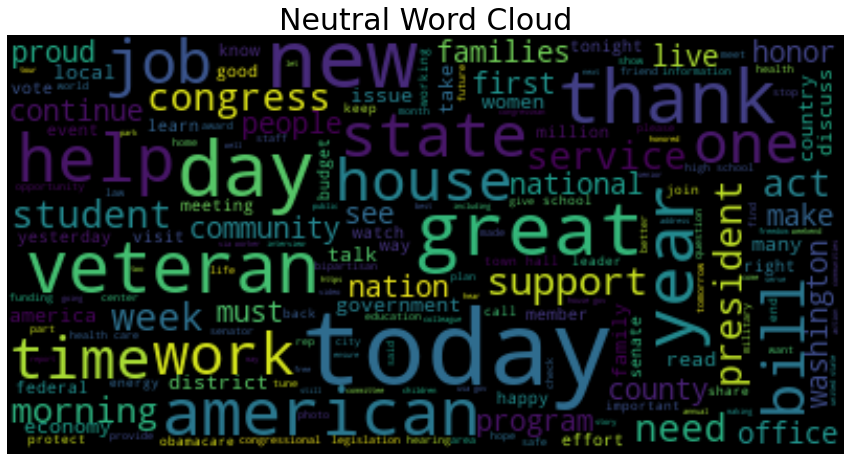

In [106]:
plot_wordcloud(clean_neutral, "Neutral")

Today,thank,great,day,new are some words that standsout from neutal tagged posts

### Classifiying Bias

Lets define X and Y.We will clean each row and append them to a new list

In [69]:
posts = []
for row in data['text']:
    posts.append(clean_words(row))
clean_posts = [" ".join(post) for post in posts]
clean_posts[0:5]    

['nowthisnews rep trey radel slams obamacare politics https zvywmg yih',
 'video obamacare full higher costs broken promises vzqirwf',
 'please join today remembering fallen heroes honoring men women currently military service sacrifices',
 'senatorleahy step toward senate debate leahy crapo vawa bill senate procedural vote today',
 'amazon delivery drones show need update law promote innovation protect privacy uas bill skq']

To convert the posts to numeric data, we'll use sklearn's TF-IDF Vectorizer. TF-IDF is a product of the following weights:

Term Frequency: Number of times a word appears in a document/total number of words in a document
Inverse Document Frequency: log of total number of documents/number of documents that contain the word

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer




In [70]:
vector = TfidfVectorizer()
X  = vector.fit_transform(clean_posts)

In [71]:
New_data=pd.get_dummies(data,columns=['bias'],drop_first=True)

In [76]:
New_data.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias:confidence,message,message:confidence,bioid,embed,id,label,source,text,bias_partisan
0,766192484,False,finalized,1,08-04-2015 21:17,national,1.0,1.0,policy,1.0,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83E+17,From: Trey Radel (Representative from Florida),twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,1
1,766192485,False,finalized,1,08-04-2015 21:20,national,1.0,1.0,attack,1.0,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11E+17,From: Mitch McConnell (Senator from Kentucky),twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,1


In [78]:
Y = New_data['bias_partisan']

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=45,test_size=.2)

### Model

#### Random Forest

In [116]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [82]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [83]:
y_pred = rf.predict(X_test)

In [89]:
print("accuracy_score ", accuracy_score(y_pred,Y_test) )
print("precision_score ", precision_score(y_pred,Y_test) )
print("recall_score ",recall_score(y_pred,Y_test) )
print(confusion_matrix(y_pred,Y_test))


accuracy_score  0.764
precision_score  0.24705882352941178
recall_score  0.5887850467289719
[[701 192]
 [ 44  63]]


Since the accuracy and precision is very poor we need to encode the data using label encoding

In [91]:
X  = vector.fit_transform(clean_posts)

le = preprocessing.LabelEncoder()
Y = pd.DataFrame(le.fit_transform(data.message)).values.ravel()

In [92]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)



In [96]:
print("accuracy_score ", accuracy_score(y_pred,Y_test) )
print("precision_score ", precision_score(y_pred,Y_test) )
print("recall_score ",recall_score(y_pred,Y_test) )
print(confusion_matrix(y_pred,Y_test))


accuracy_score  0.766
precision_score  0.2549019607843137
recall_score  0.5963302752293578
[[701 190]
 [ 44  65]]


In [99]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [100]:
y_pred = rf.predict(X_test)

In [101]:
print("accuracy_score ", accuracy_score(y_pred,Y_test) )
print("precision_score ", precision_score(y_pred,Y_test) )
print("recall_score ",recall_score(y_pred,Y_test) )
print(confusion_matrix(y_pred,Y_test))

accuracy_score  0.766
precision_score  0.2549019607843137
recall_score  0.5963302752293578
[[701 190]
 [ 44  65]]


### Fine Tuning

In [108]:
rft=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,criterion='entropy')

In [110]:
rft.fit(X_train,Y_train)
y_pred=rft.predict(X_test)

In [112]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.745
precision score: 0.3725
recall_score: 0.5
f1 score: 0.4269340974212034


C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
# Gradient Boosting

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
y_pred=gb.predict(X_test)

In [115]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.771
precision score: 0.715311004784689
recall_score: 0.5909593367548361
f1 score: 0.5970799734671004
